# IMPORTING LIBRARIES

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# DATA AUGMENTATION

In [18]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

# Loading the Dataset

In [19]:
train_set = train.flow_from_directory(r'/content/drive/MyDrive/Data/dataset_mnist/train',
                                      target_size=(224,224),
                                      class_mode='categorical')

test_set = test.flow_from_directory(r'/content/drive/MyDrive/Data/dataset_mnist/test',
                                      target_size=(224,224),
                                      class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


### VGG16 ARCHITECTURE

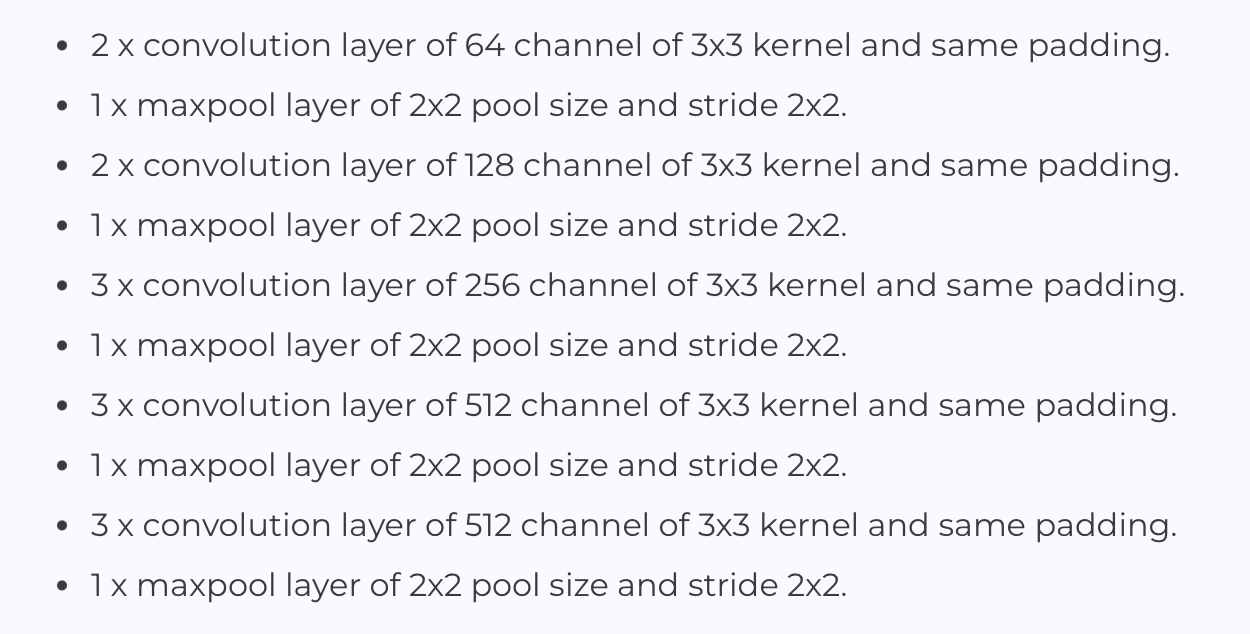

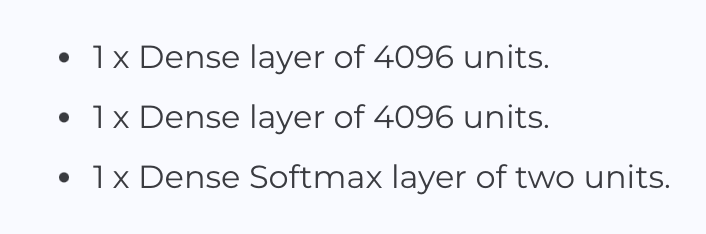

## MODEL BUILDING

In [20]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

# MODEL SUMMARY

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

# MODEL COMPILATION

In [22]:
opt = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# MODEL TRAINING

In [23]:
history = model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
32/32 [==============================] - 22s 517ms/step - loss: 2.2838 - accuracy: 0.3330 - val_loss: 2.1707 - val_accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 16s 494ms/step - loss: 1.3054 - accuracy: 0.6360 - val_loss: 0.5457 - val_accuracy: 0.8400
Epoch 3/10
32/32 [==============================] - 15s 464ms/step - loss: 0.5260 - accuracy: 0.8400 - val_loss: 0.3120 - val_accuracy: 0.9100
Epoch 4/10
32/32 [==============================] - 15s 467ms/step - loss: 0.3280 - accuracy: 0.9010 - val_loss: 0.2758 - val_accuracy: 0.9200
Epoch 5/10
32/32 [==============================] - 16s 489ms/step - loss: 0.2355 - accuracy: 0.9280 - val_loss: 0.4474 - val_accuracy: 0.8500
Epoch 6/10
32/32 [==============================] - 15s 479ms/step - loss: 0.1843 - accuracy: 0.9470 - val_loss: 0.3008 - val_accuracy: 0.8700
Epoch 7/10
32/32 [==============================] - 15s 473ms/step - loss: 0.1505 - accuracy: 0.9530 - val_loss: 0.2557 - val_accuracy: 0.9000

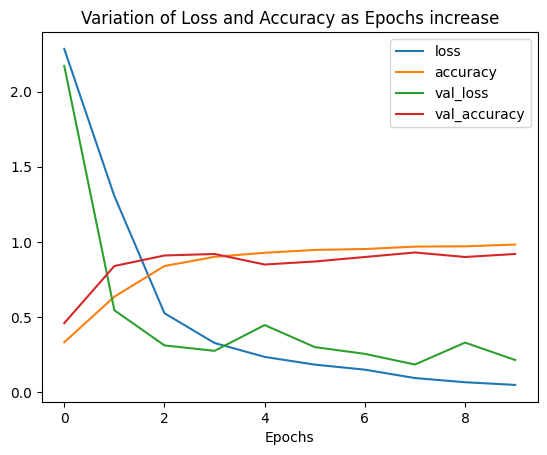

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.xlabel("Epochs")
plt.title("Variation of Loss and Accuracy as Epochs increase")
plt.show()